In [41]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib notebook

In [14]:
dataset = pd.read_csv('adult_cleaned.csv')

In [15]:
dataset.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,<=50K
1,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,1,14084,0,50,United-States,>50K
2,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,5178,0,40,United-States,>50K
3,43,Private,11th,7,Married-civ-spouse,Transport-moving,Husband,White,0,0,2042,40,United-States,<=50K
4,45,Private,Bachelors,13,Divorced,Exec-managerial,Own-child,White,0,0,1408,40,United-States,<=50K


In [25]:
X=dataset.iloc[:, [8,0]]

In [26]:
Y=dataset.iloc[:, -1]

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.25, random_state=0)

In [21]:
from sklearn.preprocessing import StandardScaler

ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

In [23]:
X.head()

,sex,age
0,0,39
1,1,31
2,0,42
3,0,43
4,0,45


In [24]:
Y.head()

0     <=50K
1      >50K
2      >50K
3     <=50K
4     <=50K
Name: class, dtype: object

In [27]:
Y = pd.get_dummies(Y)

In [28]:
Y.head()

,<=50K,>50K
0,True,False
1,False,True
2,False,True
3,True,False
4,True,False


In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
LR = LogisticRegression()

In [31]:
LR.fit(X_train, y_train)

LogisticRegression()

In [32]:
pred = LR.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)

TN, FP, FN, TP = confusion_matrix(y_test, pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  498
False Positive(FP) =  272
True Negative(TN)  =  138
False Negative(FN) =  84


In [34]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy of the binary classifier = 0.641


In [35]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test, pos_label=' >50K')
    recall[key] = recall_score(predictions, y_test, pos_label=' >50K')

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [39]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.641129,0.855670,0.646753
Support Vector Machines,0.638105,0.853952,0.644617
Decision Trees,0.655242,0.814433,0.669492
Random Forest,0.655242,0.821306,0.667598
Naive Bayes,0.669355,0.829897,0.678371
K-Nearest Neighbor,0.608871,0.694158,0.657980


<IPython.core.display.Javascript object>


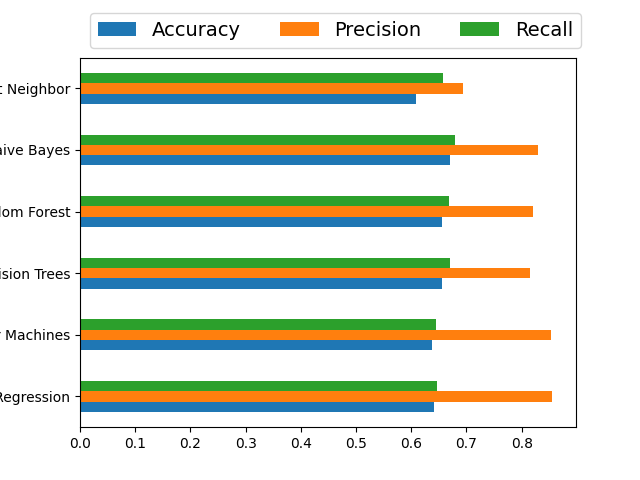

AttributeError: module 'matplotlib' has no attribute 'tight_layout'

In [43]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()